# Objetivo del Modelo

De acuerdo con el comportamiento de 24 meses de un portafolio de crédito, elaborar un modelo que nos ayude a precedir si los clientes a los que se les está aprobando un crédito actualmente terminarán resultando en una pérdida para la compañía de acuerdo con sus comportamientos de pago.


# Inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [20]:
database = pd.read_csv('~/Documents/GitHub/FinalProjectLCA/data/cleaned/totaldata.csv', delimiter=';')

In [21]:
database.head(5)

,account__id,customer_status_final,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,5d1bdad7-8431-4f8e-87dd-21147529d194,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5d38cfc2-1913-4623-b1e7-44bcb6867d96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5d39f1ef-625c-43b3-970e-bdb28ac37bce,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5d3a0d04-4170-45bd-9c43-e4401ce74279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5d3a0d84-faea-4d07-ad24-505ccb394e34,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


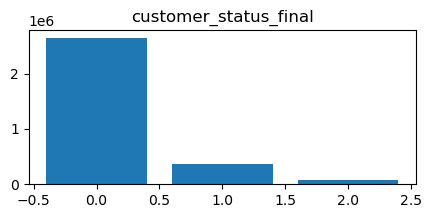

In [22]:
plt.figure(figsize=(5,2))
plt.bar(database['customer_status_final'].unique(),database['customer_status_final'].value_counts())
plt.title('customer_status_final')
plt.show()

Nuestra variable target será "customer_staus_final"

In [23]:
database.columns

Index(['account__id', 'customer_status_final', '2021-01-31', '2021-02-28',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-05-31', '2022-06-30',
       '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
       '2022-12-31'],
      dtype='object')

In [24]:
database.isna().sum()

account__id              0
customer_status_final    0
2021-01-31               0
2021-02-28               0
2021-03-31               0
2021-04-30               0
2021-05-31               0
2021-06-30               0
2021-07-31               0
2021-08-31               0
2021-09-30               0
2021-10-31               0
2021-11-30               0
2021-12-31               0
2022-01-31               0
2022-02-28               0
2022-03-31               0
2022-05-31               0
2022-06-30               0
2022-07-31               0
2022-08-31               0
2022-09-30               0
2022-10-31               0
2022-11-30               0
2022-12-31               0
dtype: int64

In [30]:
db = database.drop(['account__id'], axis = 1)

In [31]:
correl = db.corr()
correl

,customer_status_final,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
customer_status_final,1.000000,0.016504,0.016928,0.017585,0.021633,0.026043,0.030653,0.037796,0.048118,0.058449,...,0.122146,0.146763,0.211631,0.354780,0.626046,0.754182,0.827324,0.887229,0.918002,0.916216
2021-01-31,0.016504,1.000000,0.732419,0.356647,0.225100,0.128881,0.094398,0.084173,0.075993,0.058894,...,0.016490,0.014968,0.011122,0.009438,0.006780,0.006116,0.004529,0.004653,0.004316,0.003850
2021-02-28,0.016928,0.732419,1.000000,0.505352,0.318251,0.191275,0.128126,0.084829,0.072961,0.061449,...,0.023112,0.020031,0.011898,0.009823,0.006447,0.005403,0.004761,0.004658,0.004438,0.003604
2021-03-31,0.017585,0.356647,0.505352,1.000000,0.602401,0.339370,0.203467,0.107286,0.072361,0.066772,...,0.022355,0.019363,0.014547,0.010788,0.007635,0.007271,0.006175,0.005999,0.005249,0.004448
2021-04-30,0.021633,0.225100,0.318251,0.602401,1.000000,0.571911,0.347531,0.180870,0.124911,0.095217,...,0.037544,0.031090,0.024006,0.017191,0.011796,0.009722,0.008425,0.008082,0.007168,0.005924
2021-05-31,0.026043,0.128881,0.191275,0.339370,0.571911,1.000000,0.599960,0.328122,0.202554,0.137206,...,0.050708,0.042862,0.029304,0.021744,0.015903,0.013519,0.011805,0.010920,0.009838,0.008293
2021-06-30,0.030653,0.094398,0.128126,0.203467,0.347531,0.599960,1.000000,0.557098,0.346796,0.216828,...,0.061643,0.049936,0.033984,0.031034,0.022075,0.017321,0.014622,0.013504,0.012546,0.010539
2021-07-31,0.037796,0.084173,0.084829,0.107286,0.180870,0.328122,0.557098,1.000000,0.613744,0.383843,...,0.074296,0.063597,0.041803,0.035567,0.027661,0.020861,0.018484,0.016735,0.015672,0.013838
2021-08-31,0.048118,0.075993,0.072961,0.072361,0.124911,0.202554,0.346796,0.613744,1.000000,0.635946,...,0.091287,0.079812,0.051614,0.044860,0.035892,0.028528,0.024951,0.023350,0.021944,0.019733
2021-09-30,0.058449,0.058894,0.061449,0.066772,0.095217,0.137206,0.216828,0.383843,0.635946,1.000000,...,0.107574,0.091328,0.061345,0.053720,0.043676,0.035728,0.031823,0.029833,0.028007,0.025464


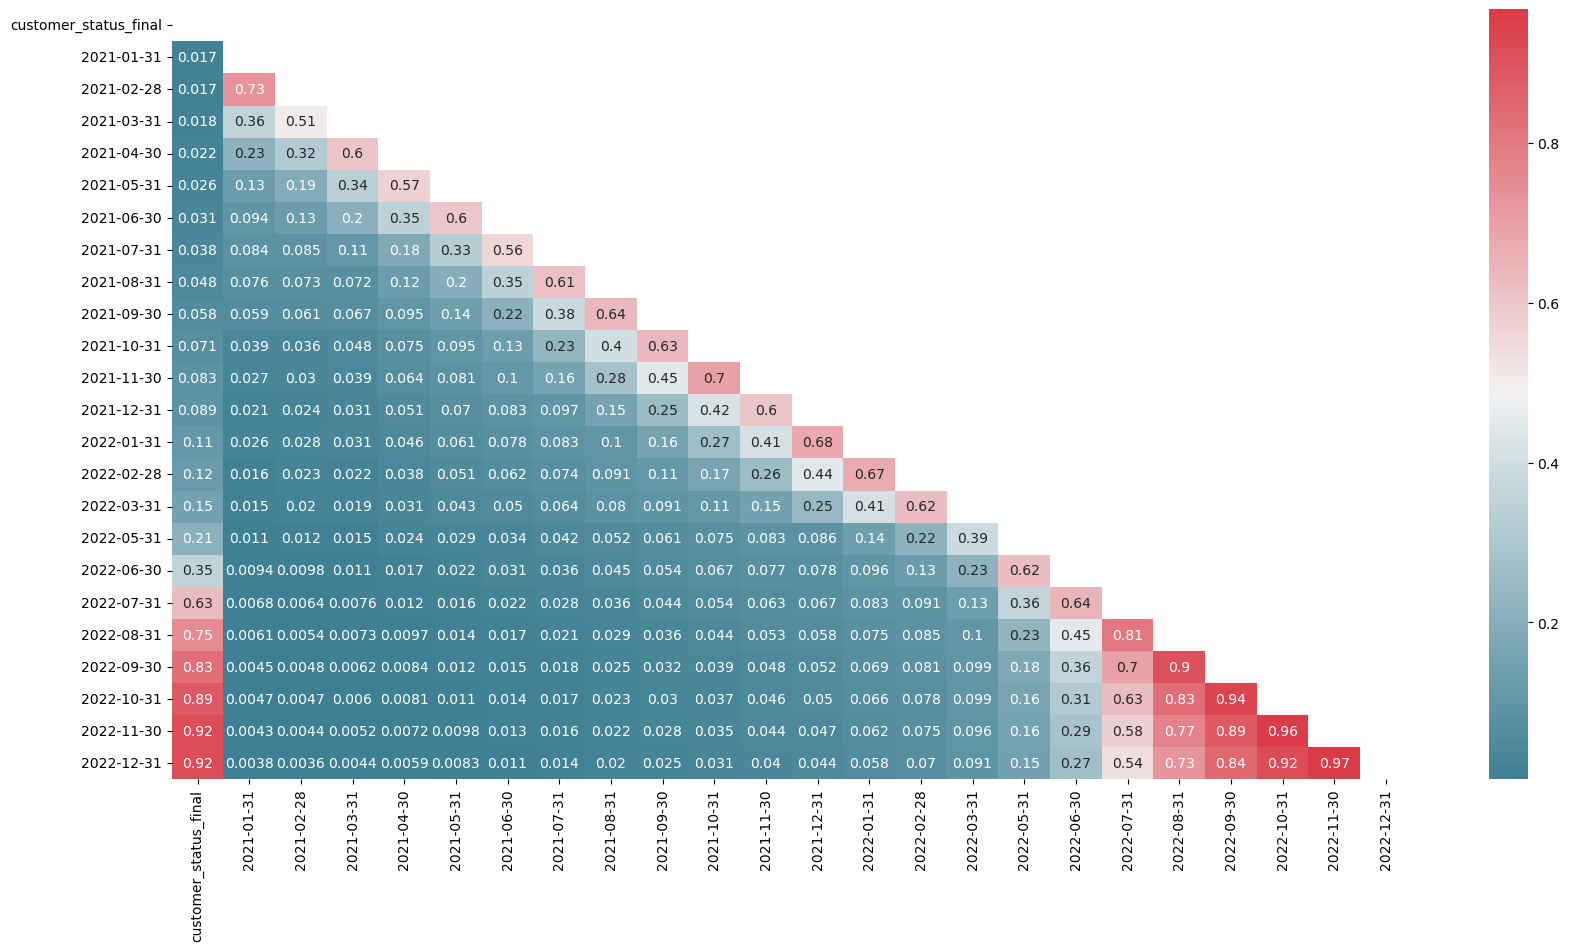

In [34]:
mask=np.triu(np.ones_like(correl, dtype=bool))

f, ax=plt.subplots(figsize=(20, 10))                 

cmap=sns.diverging_palette(220, 10, as_cmap=True)   

sns.heatmap(correl, mask=mask, cmap=cmap, annot=True)
plt.show()

In [36]:
x = db.drop(['customer_status_final'], axis = 1)
y = db['customer_status_final']

In [37]:
x.shape, y.shape

((3094282, 23), (3094282,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
classification = LogisticRegression(random_state=42, solver='lbfgs',class_weight='balanced').fit(X_train, y_train)

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classification.coef_, classification.intercept_, classification.n_iter_

#Evalaución de resultados

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_train = classification.predict(X_train)
cm=confusion_matrix(y_pred_train, y_train)
cm

In [ ]:
clean_df.own_your_home.value_counts()

In [ ]:
y_train.value_counts()

In [ ]:
sns.heatmap(cm, fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_test = classification.predict(X_test)
cm_test = confusion_matrix(y_pred_test, y_test)
cm_test

In [ ]:
sns.heatmap(cm_test, fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
yunir = pd.DataFrame(y_test)

In [ ]:
yunir

In [ ]:
finalTest = X_test.merge(yunir, how='inner', left_index=True,right_index=True)

In [ ]:
finalTest.to_csv('datos_test.csv')